## Logistic Regression with Product List

> Indented block



### Multinomial Logistic Regression

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
import math

Goal: predict disease class from the data. \
We will be using multinomial logistic regression.
Dataset can be found at: https://archive.ics.uci.edu/ml/datasets/dermatology

In [2]:
# Pre-processing
# dermatology.csv can be found in the GitHub
full_data = pd.read_csv("juiced2.csv", delimiter = ',')
full_data.head()
full_data.drop(columns = full_data.columns[0], axis = 1, inplace = True)

In [3]:
full_data.head()

,mean.visitpagenum.,myaccountengagement,used_promo,category,devicetype_Mobile,devicetype_Tablet,devicetype_Unknown,firsthitpagename_checkout,firsthitpagename_index,firsthitpagename_my.account,...,productlist_first_Home,productlist_first_Home.Improvement,productlist_first_Jewelry...Watches,productlist_first_Kitchen,productlist_first_Movies,productlist_first_Personal.Care,productlist_first_Shoes,productlist_first_Sports...Outdoors,productlist_first_Toys,productlist_first_Video.Games
0,-0.184591,60,0,Category2,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.173183,67,1,Category4,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.421184,61,1,Category2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.888599,60,0,Category4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.300002,82,0,Category4,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Since logistic regression tries to find a linear boundary between classes in our data, we will first try to visualize our data.

In [4]:
full_data.describe()

,mean.visitpagenum.,myaccountengagement,used_promo,devicetype_Mobile,devicetype_Tablet,devicetype_Unknown,firsthitpagename_checkout,firsthitpagename_index,firsthitpagename_my.account,firsthitpagename_other,...,productlist_first_Home,productlist_first_Home.Improvement,productlist_first_Jewelry...Watches,productlist_first_Kitchen,productlist_first_Movies,productlist_first_Personal.Care,productlist_first_Shoes,productlist_first_Sports...Outdoors,productlist_first_Toys,productlist_first_Video.Games
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.0,7500.00000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,5.065133e-16,65.856133,0.436533,0.484533,0.269200,0.0,0.00200,0.469467,0.396400,0.036400,...,0.061200,0.014000,0.054800,0.086800,0.006533,0.062267,0.088400,0.039733,0.131067,0.077733
std,1.000000e+00,7.127791,0.495989,0.499794,0.443574,0.0,0.04468,0.499100,0.489182,0.187296,...,0.239713,0.117498,0.227605,0.281561,0.080570,0.241655,0.283895,0.195345,0.337496,0.267769
min,-1.130962e+00,1.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.577766e-01,61.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.000024e-01,64.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.116762e-01,70.000000,1.000000,1.000000,1.000000,0.0,0.00000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.678977e+00,94.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

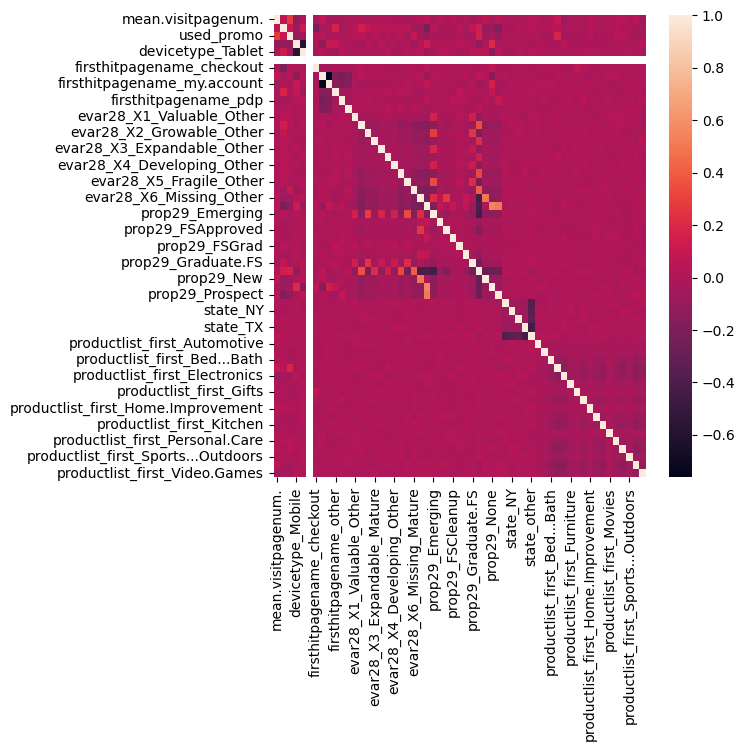

In [5]:
plt.figure(figsize=(6,6))
sns.heatmap(full_data.corr())

Text(0.5, 1.0, 'Histogram of Categories (Category Frequency)')

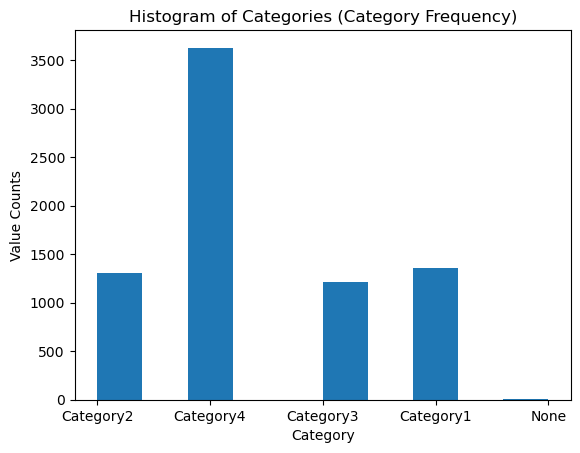

In [6]:
# Visualization - lots of cases of Category 4
plt.hist(full_data[['category']])
plt.xlabel('Category')
plt.ylabel('Value Counts')
plt.title('Histogram of Categories (Category Frequency)')

We split our dataset into our features (57 features) and our target (1 target).

In [7]:
full_data.head()

,mean.visitpagenum.,myaccountengagement,used_promo,category,devicetype_Mobile,devicetype_Tablet,devicetype_Unknown,firsthitpagename_checkout,firsthitpagename_index,firsthitpagename_my.account,...,productlist_first_Home,productlist_first_Home.Improvement,productlist_first_Jewelry...Watches,productlist_first_Kitchen,productlist_first_Movies,productlist_first_Personal.Care,productlist_first_Shoes,productlist_first_Sports...Outdoors,productlist_first_Toys,productlist_first_Video.Games
0,-0.184591,60,0,Category2,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.173183,67,1,Category4,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.421184,61,1,Category2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.888599,60,0,Category4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.300002,82,0,Category4,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# features_list = ['devicetype', 'firsthitpagename', 'mean.visitpagenum.', 'evar28', 'prop29', 'state', 'myaccountengagement', 'used_promo']
features_list = full_data.columns.values.tolist()

In [9]:
print(features_list.remove('category'))

None


In [10]:
features_list

['mean.visitpagenum.',
 'myaccountengagement',
 'used_promo',
 'devicetype_Mobile',
 'devicetype_Tablet',
 'devicetype_Unknown',
 'firsthitpagename_checkout',
 'firsthitpagename_index',
 'firsthitpagename_my.account',
 'firsthitpagename_other',
 'firsthitpagename_pdp',
 'firsthitpagename_search',
 'evar28_X1_Valuable_Other',
 'evar28_X2_Growable_Mature',
 'evar28_X2_Growable_Other',
 'evar28_X3_Expandable_Mature',
 'evar28_X3_Expandable_Other',
 'evar28_X4_Developing_Mature',
 'evar28_X4_Developing_Other',
 'evar28_X5_Fragile_Mature',
 'evar28_X5_Fragile_Other',
 'evar28_X6_Missing_Mature',
 'evar28_X6_Missing_Other',
 'evar28_None',
 'prop29_Emerging',
 'prop29_FreshStart',
 'prop29_FSApproved',
 'prop29_FSCleanup',
 'prop29_FSGrad',
 'prop29_FSRetry',
 'prop29_Graduate.FS',
 'prop29_Mature',
 'prop29_New',
 'prop29_None',
 'prop29_Prospect',
 'state_FL',
 'state_NY',
 'state_PA',
 'state_TX',
 'state_other',
 'productlist_first_Automotive',
 'productlist_first_Baby',
 'productlist_fi

In [11]:
len(features_list)

57

In [12]:
def factor(var):
    var_set = set(var)
    var_set = {x: y for x, y in [pair for pair in zip(var_set, range(len(var_set)))]}
    return [var_set[x] for x in var]

Now we standardize the data to ensure that our data has a standard deviation of 1.

In [13]:
# features = subset_data[['devicetype', 'firsthitpagename', 'mean.visitpagenum.', 'evar28', 'prop29', 'state', 'myaccountengagement', 'used_promo']]
features = full_data[features_list]
features = features.to_numpy()
target = full_data[['category']]
target = target.to_numpy()
target = np.squeeze(target)

In [14]:
# 8 features, 1 target
features.shape, target.shape

((7500, 57), (7500,))

In [15]:
x = full_data['myaccountengagement'] - max(full_data['myaccountengagement'])

In [16]:
y = max(full_data['myaccountengagement']) - min(full_data['myaccountengagement'])

In [17]:
normalized_account = x/y

In [18]:
full_data['myaccountengagement'] = normalized_account

In [19]:
full_data.head()

,mean.visitpagenum.,myaccountengagement,used_promo,category,devicetype_Mobile,devicetype_Tablet,devicetype_Unknown,firsthitpagename_checkout,firsthitpagename_index,firsthitpagename_my.account,...,productlist_first_Home,productlist_first_Home.Improvement,productlist_first_Jewelry...Watches,productlist_first_Kitchen,productlist_first_Movies,productlist_first_Personal.Care,productlist_first_Shoes,productlist_first_Sports...Outdoors,productlist_first_Toys,productlist_first_Video.Games
0,-0.184591,-0.365591,0,Category2,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.173183,-0.290323,1,Category4,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.421184,-0.354839,1,Category2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.888599,-0.365591,0,Category4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.300002,-0.129032,0,Category4,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x = full_data['category']

In [21]:
for k in range(len(x)):
  if x[k] == 'Category4':
    x[k] = 4
  elif x[k] == 'Category3':
    x[k] = 3
  elif x[k] == 'Category2':
    x[k] = 2
  elif x[k] == 'Category1':
    x[k] = 1
  elif x[k] == 'None':
    x[k] = 0

/tmp/ipykernel_7057/3516725726.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[k] = 2
/tmp/ipykernel_7057/3516725726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[k] = 4
/tmp/ipykernel_7057/3516725726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[k] = 3
/tmp/ipykernel_7057/3516725726.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [22]:
full_data['category'] = x

In [23]:
full_data.head()

,mean.visitpagenum.,myaccountengagement,used_promo,category,devicetype_Mobile,devicetype_Tablet,devicetype_Unknown,firsthitpagename_checkout,firsthitpagename_index,firsthitpagename_my.account,...,productlist_first_Home,productlist_first_Home.Improvement,productlist_first_Jewelry...Watches,productlist_first_Kitchen,productlist_first_Movies,productlist_first_Personal.Care,productlist_first_Shoes,productlist_first_Sports...Outdoors,productlist_first_Toys,productlist_first_Video.Games
0,-0.184591,-0.365591,0,2,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.173183,-0.290323,1,4,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.421184,-0.354839,1,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.888599,-0.365591,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.300002,-0.129032,0,4,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Successfully standardized the features
# for i in range(features.shape[1]):
#     print(np.std(features[:,i]))

Now we define our logit function that will take in our features, and our randomly initialized $w_0$ (weight parameter) and $b_0$ (bias parameter) and calculate a logit score for each feature. As a reminder, a logit function (log-odds function) calculates the probability of a certain event occurring in the domain of [0,1]. It is the inverse of the logistic sigmoid function, which predicts probabilities in the range of [0,1].

In [24]:
def logitscores(features, w_0, b_0):
    logitvalues = np.zeros(shape=(features.shape[0],5))
    for i in range(len(logitvalues)):
        # For every row in the features dataframe, take the dot product with the weights and add the bias
        # w^Tx + b => hyperplane
        logit = np.squeeze(np.dot(w_0, features[i]) + np.transpose(b_0))
        logitvalues[i,:] = logit
    return logitvalues

Now we define a softmax function. In multinomial logistic regression, we use a softmax function, which calculates the probabilities of K possible outcomes for a vector of K numbers. This is a generalization of the sigmoid function used in binary logistic regression. The softmax function is:

$$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

In [25]:
def softmax(logitvalues, axis=-1):
    K_prob = np.zeros(logitvalues.shape)
    # We us kw to scale the softmax values to be between 0 and 1
    kw = dict(axis=axis, keepdims = True)
    logitvalues = logitvalues - logitvalues.max(**kw)
    for i in range(logitvalues.shape[0]):
        # Use the definition of the softmax function
        a = np.exp(logitvalues[i])
        b = a/a.sum(**kw)
        K_prob[i] = b
    return K_prob

Now we define our Logisitc Regression function. We calculate the logit scores, the probability matrix (the probability of each data point (person) being classified in each class (from 1-6), and classify each data point (person) into the class with the highest probability.

In [26]:
def TrainingLogisticRegression(X_train, w_0, b_0):
    logits = logitscores(X_train, w_0, b_0)
    K_prob = softmax(logits)
    # K_prob = np.nan_to_num(K_prob,10**-10)
    predict = np.zeros(shape=X_train.shape[0])
    for i in range(K_prob.shape[0]):
        predict[i] = np.argmax(K_prob[i])
    return K_prob, predict

We initialize random weights and biases to test our functions.

In [27]:
features = full_data[features_list]
features = features.to_numpy()
target = full_data[['category']]
target = target.to_numpy()
target = np.squeeze(target)

In [28]:
target = target.astype('int')

In [29]:
features.shape

(7500, 57)

In [30]:
len(target)

7500

In [31]:
w_0 = np.random.randn(5,57)
b_0 = np.random.randn(5,1)

In [32]:
K_prob, predict = TrainingLogisticRegression(features, w_0, b_0)
print(K_prob.shape)
print(predict.shape)

(7500, 5)
(7500,)


In [33]:
K_prob[0]

array([0.24711677, 0.24051416, 0.05002349, 0.00523006, 0.45711553])

In [34]:
predict

array([4., 2., 0., ..., 4., 4., 1.])

In [35]:
def model_accuracy(predict, target):
    return 100.0 * np.sum(predict == target)/len(target)

In [36]:
model_accuracy(predict, target)

14.76

The model accuracy is pretty low since this it is generic, so we will improve our model by optimizing hyperparameters.

### Optimizing our model

We split our data into training and testing data.

In [37]:
# running train_test_split for our dataset
train_features, test_features, train_target, test_target = train_test_split(features,target,test_size = 0.3)

In [38]:
train_features.shape, test_features.shape, train_target.shape, test_target.shape

((5250, 57), (2250, 57), (5250,), (2250,))

We scale the data to ensure a standard deviation of 1

In [ ]:
# scaler = StandardScaler().fit(train_features)
# train_features = scaler.transform(train_features)
# scaler = StandardScaler().fit(test_features)
# test_features = scaler.transform(test_features)

In [ ]:
# for i in range(train_features.shape[1]):
#     print(np.std(train_features[:,i]))
# for i in range(test_features.shape[1]):
#     print(np.std(test_features[:,i]))

In multinomial logistic regression, maximizing the likelihood of the parameters is equivalent to minimizing the cross-entropy loss. We will define our cross-entropy loss function that we will later minimize using an algorithm. 

As a reminder, cross-entropy loss is defined as:

$$J(\theta) = -[\sum_{i=1}^m y^{(i)} \log h_{\theta} (x^{(i)}) + (1-y^{(i)} \log (1- h_{\theta}(x^{(i)}))]$$

where $(x^{(i)}, y^{(i)})$ correspond to a data point from our training set and $h_{\theta}$ is the probability of our parameter set being equal to $\theta$.

In [39]:
def CELoss(K_prob, target):
    target = target-1
    total_loss = 0
    for i in target:
        total_loss += -np.log(K_prob[i])
    avg_loss = total_loss/K_prob.shape[0]
    return np.average(avg_loss)

We use Stochastic Gradient Descent to minimize our cross-entropy loss. We calculate the probability matrix (the probability of each data point (person) being classified in each class (from 1-6)) and the prediction vector (the predicted class of each data point (person) based on the highest probability). We then find the gradient of our $w_0$ weight vector and $b_0$ bias vector and implement the algorithm:

$$w_{k+1} = w_k - (\alpha * \nabla(f(w_k)))$$
$$b_{k+1} = b_k - (\alpha * \nabla(f(b_k)))$$

for $i = 1,...,\text{K_max}$ where $\text{K_max}$ is the maximum number of iterations.

In [40]:
def SGD(alpha, K_max, target, features, w_0, b_0):

    loss_function = np.zeros(features.shape[0])
 
    for i in range(K_max):
        prob,predict = TrainingLogisticRegression(features, w_0, b_0)
        loss_function[i] = CELoss(prob, target)
        prob[np.arange(features.shape[0]),target] -= 1
        
        grad_weight = np.dot(prob.T,features)
        grad_biases = np.matrix(np.sum(prob, axis = 0)).T
        
        w_0 -= (alpha * grad_weight)
        b_0 -= (alpha * grad_biases)
        
    return w_0,b_0,loss_function

We initialize random $w_0$ and $b_0$ and run our SGD algorithm.

In [41]:
w_0 = np.random.randn(5, 57)
b_0 = np.random.randn(5,1)

In [42]:
w_star, b_star, loss_function = SGD(0.1, 100, train_target-1, train_features, w_0, b_0)

/tmp/ipykernel_7057/3864495697.py:5: RuntimeWarning: divide by zero encountered in log
  total_loss += -np.log(K_prob[i])


In [43]:
w_star = np.nan_to_num(w_star,0)

In [44]:
test_prob, test_pred = TrainingLogisticRegression(test_features, w_star, b_star)
test_pred = test_pred + 1

model_accuracy(test_pred, test_target)

48.355555555555554

---------

We can compare the accuracy of our model with the built-in LogisticRegression function in sklearn.

In [45]:
train_features = train_features.astype('float')
test_features = test_features.astype('float')

In [46]:
train_features = np.nan_to_num(train_features,0)
test_features = np.nan_to_num(test_features,0)

In [47]:
test_features

array([[-0.41541341, -0.20430108,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.507875  , -0.31182796,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.25804683, -0.25806452,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.60020384, -0.30107527,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27692014, -0.33333333,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.75010545, -0.33333333,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

We use the LogisticRegression function in sklearn, with argument multiclass = 'multinomial'.

In [48]:
model = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial')
model.fit(train_features, train_target)
class_pred = model.predict(train_features)
score = model.score(test_features, np.squeeze(test_target))
print(score)

0.4831111111111111


The sklearn accuracy score is very similar to our accuracy score.

We also do 5-fold cross validation and take the average to find the average model accuracy of our five repetitions.

In [49]:
cross_val = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(cross_val, train_features, train_target, cv=5)
scores

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


array([0.48190476, 0.4847619 , 0.48      , 0.48285714, 0.48190476])

In [50]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.48 (+/- 0.00)


The accuracy is similar to our model.